### SVM(Support Vector Machine)
인공신경망이 딥러닝을 통해 인공지능 분야의 중심으로 떠오르기 전 가장 각광받던 학습 방법이다.
+ 두 데이터 그룹을 나누는 초평면(hyperplane)을 찾으면서 그 폭(margin)이 가장 넓은 것을 찾는다.
+ Hard margin : 마진 내에 어떠한 데이터도 들어오지 않아야 함 => 잡음에 민감 => 과적합에 취약
+ Soft margin : 일부 데이터가 마진 내에 들어오게 허용함 => 개수 제어 가능(slack 변수)
+ 하드, 소프트 모두 마진을 최대로 넓게 많들려고 하기 때문에  
마진의 양쪽에는 서로 다른 데이터 그룹에 속하는 데이터들이 하나씩 닿아있게 되는데, 이것들을 서포트 벡터라고 한다.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = 'https://github.com/dknife/ML/raw/main/data/two_classes.csv'
df = pd.read_csv(url)
df.tail()   #y는 0, 1 라벨

,x1,x2,y
995,2.664896,-1.955326,0
996,-2.019928,0.334542,1
997,-4.634470,0.300158,1
998,1.426275,-2.765590,0
999,1.988053,1.466494,0


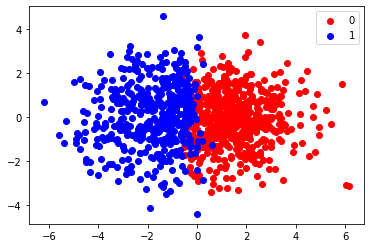

In [4]:
df_0 = df[df.y == 0]
df_1 = df[df.y == 1]

plt.scatter(df_0['x1'], df_0['x2'], color='r', label='0')
plt.scatter(df_1['x1'], df_1['x2'], color='b', label='1')
plt.legend();

In [7]:
from sklearn.svm import LinearSVC

X = df[['x1', 'x2']].to_numpy()  #(1000, 2)
y = df['y']                      #(1000, )

model = LinearSVC(C=1, loss='hinge')  #C:slack 변수 최적화의 가중치, loss:hinge(max(0,1-h)), squared_hinge 두가지만 가능
model.fit(X, y)

LinearSVC(C=1, loss='hinge')

In [8]:
new_data = [[0.12, 0.56], [-4, 40], [0, 40], [5, 20]]

pred = model.predict(new_data)
pred

array([0, 1, 1, 0], dtype=int64)

In [11]:
#!pip install yellowbrick

C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\yellowbrick\contrib\classifier\boundaries.py:435: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  self.ax.pcolormesh(


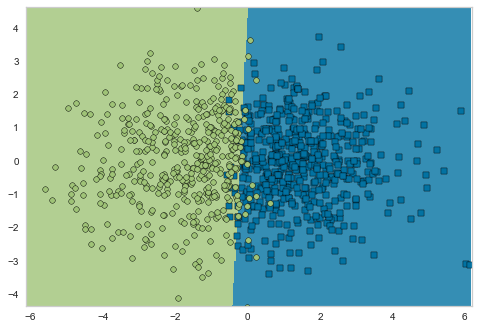

In [14]:
from yellowbrick.contrib.classifier import DecisionViz

graph = DecisionViz(model, title='linear SVM')
graph.fit(X, y)
graph.draw(X, y)

SVM은 데이터 값의 크기에 민감하기 때문에, 데이터 정제(정규화, 표준화 등)가 필요하다.  
=> sklearn 패키지의 pipeline 사용
+ pipeline은 학습을 위한 머신러닝 알고리즘 클래스를 생성할 때, 데이터를 전처리하는 과정을 포함하도록 도와준다.
+ 데이터 표준화, 비선형 모델 생성을 위한 전처리 과정이 포함된다.
+ 파이프라인은 리스트 안에 처리과정들을 담으면 된다.
+ 각 처리과정은 튜플 안에 (이름, 객체)를 담으면 된다.

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipe = Pipeline([('std', StandardScaler()),   
                 ('lsvm', LinearSVC(C=1, loss='hinge'))])
pipe.fit(X, y)

Pipeline(steps=[('std', StandardScaler()),
                ('lsvm', LinearSVC(C=1, loss='hinge'))])

C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\yellowbrick\contrib\classifier\boundaries.py:435: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  self.ax.pcolormesh(


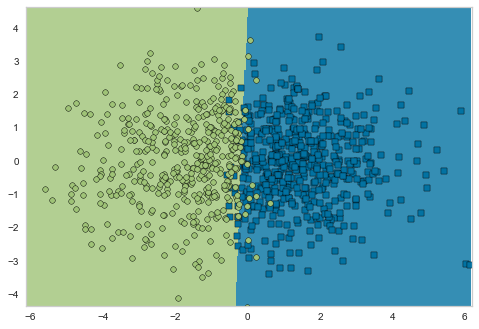

In [17]:
graph = DecisionViz(pipe, title='Standardization - SVM')
graph.fit(X, y)
graph.draw(X, y)

다항회귀에서 사용했던 PolynomialFeatures 메소드는 데이터 정제 메소드로, 학습 알고리즘에 관계없이 사용할 수 있다.  
입력 특성이 x 하나일 때, 2차 다항특징변환을 수행한다면 x^2, x의 두가지 특성을 사용할 수 있게 된다.  
=> Pipeline에 PolynomialFeatures 도 추가해보자

C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\yellowbrick\contrib\classifier\boundaries.py:435: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become 

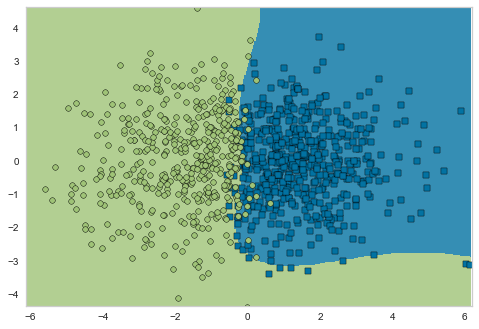

In [21]:
from sklearn.preprocessing import PolynomialFeatures

pipe = Pipeline([('std', StandardScaler()),                     #입력데이터 표준화 후 
                 ('poly_inputs', PolynomialFeatures(degree=5)), #5차원 다항특징변환 후
                 ('lsvm', LinearSVC(C=1, loss='hinge')),])      #모델학습 적용
pipe.fit(X, y)

graph = DecisionViz(pipe, title='Standardization - SVM')
graph.fit(X, y)
graph.draw(X, y)    #경계선은 5차원 입력값에서 얻어지는 초평면으로, 원래의 입력공간에서는 직선이 아닌 비선형 경계로 표시됨

### Quiz.
선형분리가 불가능하도록 섞여있는 두 종류의 데이터 인스턴스들을 분류할 수 있도록 SVM을 학습시켜 보자.

In [25]:
url = 'https://github.com/dknife/ML/raw/main/data/twisted_data.csv'
df = pd.read_csv(url)
df.head()

,x1,x2,y
0,-0.708553,-0.648847,0
1,0.326029,-0.551734,0
2,-3.105980,0.149616,0
3,-0.529565,-0.812004,0
4,2.837286,-0.176169,1


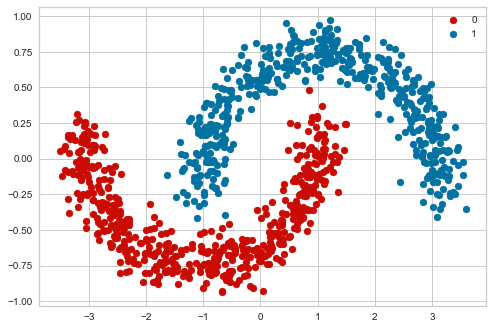

In [26]:
df_0 = df[df.y == 0]
df_1 = df[df.y == 1]

plt.scatter(df_0['x1'], df_0['x2'], color='r', label='0')
plt.scatter(df_1['x1'], df_1['x2'], color='b', label='1')
plt.legend();

C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\yellowbrick\contrib\classifier\boundaries.py:435: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  self.ax.pcolormesh(


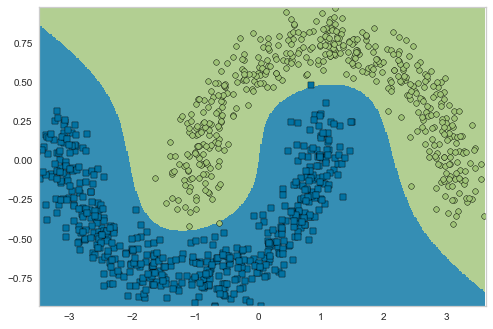

In [29]:
X = df[['x1', 'x2']].to_numpy()
y = df['y']

pipe = Pipeline([('scaler', StandardScaler()),
                 ('poly_features', PolynomialFeatures(degree=5)),
                 ('model', LinearSVC(C=1, loss='hinge'))])
pipe.fit(X, y)

graph = DecisionViz(pipe, title='Polynomial feature - SVM')
graph.fit(X, y)
graph.draw(X, y) 